### Importing useful packages and loading BindingDB dataset:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import requests
import re
import lxml
from bs4 import BeautifulSoup
import sys
import os
import json

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [7]:
BINDING_DATASET = "../data/BindingDB_All.tsv"

In [8]:
# Only loading columns of interest for this part :
usecols = [
    # 'BindingDB Reactant_set_id',
    # 'Ligand SMILES',
    # 'Ligand InChI',
    # 'Ligand InChI Key',
    # 'BindingDB MonomerID',
    "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    #'Ki (nM)',
    #'IC50 (nM)',
    #'Kd (nM)',
    #'EC50 (nM)',
    #'kon (M-1-s-1)',
    #'koff (s-1)',
    # 'pH',
    # 'Temp (C)',
    # "Curation/DataSource",
    "Article DOI",
    # 'BindingDB Entry DOI',
    # 'PMID',
    # 'PubChem AID',
    "Patent Number",
    # "Authors",
    # "Institution",
    # 'Link to Ligand in BindingDB',
    # 'Link to Target in BindingDB',
    # 'Link to Ligand-Target Pair in BindingDB',
    # 'Ligand HET ID in PDB',
    # 'PDB ID(s) for Ligand-Target Complex',
    # 'PubChem CID',
    # 'PubChem SID',
    #'ChEBI ID of Ligand',
    #'ChEMBL ID of Ligand',
    #'DrugBank ID of Ligand',
    #'IUPHAR_GRAC ID of Ligand',
    #'KEGG ID of Ligand',
    #'ZINC ID of Ligand',
    # 'Number of Protein Chains in Target (>1 implies a multichain complex)',
    # 'BindingDB Target Chain Sequence',
    # 'PDB ID(s) of Target Chain',
    # 'UniProt (SwissProt) Recommended Name of Target Chain',
    # 'UniProt (SwissProt) Entry Name of Target Chain',
    "UniProt (SwissProt) Primary ID of Target Chain",
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain',
    # 'UniProt (TrEMBL) Entry Name of Target Chain',
    #'UniProt (TrEMBL) Primary ID of Target Chain',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain',
    # 'BindingDB Target Chain Sequence.1',
    # 'PDB ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.1',
    # 'UniProt (SwissProt) Entry Name of Target Chain.1',
    # 'UniProt (SwissProt) Primary ID of Target Chain.1',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.1',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.1',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.1',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.1',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.1',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.1',
    # 'BindingDB Target Chain Sequence.2',
    # 'PDB ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.2',
    # 'UniProt (SwissProt) Entry Name of Target Chain.2',
    # 'UniProt (SwissProt) Primary ID of Target Chain.2',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.2',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.2',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.2',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.2',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.2',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.2',
    # 'BindingDB Target Chain Sequence.3',
    # 'PDB ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.3',
    # 'UniProt (SwissProt) Entry Name of Target Chain.3',
    # 'UniProt (SwissProt) Primary ID of Target Chain.3',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.3',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.3',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.3',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.3',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.3',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.3',
    # 'BindingDB Target Chain Sequence.4',
    # 'PDB ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.4',
    # 'UniProt (SwissProt) Entry Name of Target Chain.4',
    # 'UniProt (SwissProt) Primary ID of Target Chain.4',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.4',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.4',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.4',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.4',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.4',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.4',
    # 'BindingDB Target Chain Sequence.5',
    # 'PDB ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.5',
    # 'UniProt (SwissProt) Entry Name of Target Chain.5',
    # 'UniProt (SwissProt) Primary ID of Target Chain.5',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.5',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.5',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.5',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.5',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.5',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.5',
    # 'BindingDB Target Chain Sequence.6',
    # 'PDB ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.6',
    # 'UniProt (SwissProt) Entry Name of Target Chain.6',
    # 'UniProt (SwissProt) Primary ID of Target Chain.6',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.6',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.6',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.6',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.6',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.6',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.6',
    # 'BindingDB Target Chain Sequence.7',
    # 'PDB ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.7',
    # 'UniProt (SwissProt) Entry Name of Target Chain.7',
    # 'UniProt (SwissProt) Primary ID of Target Chain.7',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.7',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.7',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.7',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.7',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.7',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.7',
    # 'BindingDB Target Chain Sequence.8',
    # 'PDB ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.8',
    # 'UniProt (SwissProt) Entry Name of Target Chain.8',
    # 'UniProt (SwissProt) Primary ID of Target Chain.8',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.8',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.8',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.8',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.8',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.8',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.8',
    # 'BindingDB Target Chain Sequence.9',
    # 'PDB ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.9',
    # 'UniProt (SwissProt) Entry Name of Target Chain.9',
    # 'UniProt (SwissProt) Primary ID of Target Chain.9',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.9',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.9',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.9',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.9',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.9',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.9',
    # 'BindingDB Target Chain Sequence.10',
    # 'PDB ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.10',
    # 'UniProt (SwissProt) Entry Name of Target Chain.10',
    # 'UniProt (SwissProt) Primary ID of Target Chain.10',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.10',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.10',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.10',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.10',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.10',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.10',
    # 'BindingDB Target Chain Sequence.11',
    # 'PDB ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.11',
    # 'UniProt (SwissProt) Entry Name of Target Chain.11',
    # 'UniProt (SwissProt) Primary ID of Target Chain.11',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.11',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.11',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.11',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.11',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.11',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.11',
    # 'BindingDB Target Chain Sequence.12',
    # 'PDB ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Recommended Name of Target Chain.12',
    # 'UniProt (SwissProt) Entry Name of Target Chain.12',
    # 'UniProt (SwissProt) Primary ID of Target Chain.12',
    # 'UniProt (SwissProt) Secondary ID(s) of Target Chain.12',
    # 'UniProt (SwissProt) Alternative ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Submitted Name of Target Chain.12',
    # 'UniProt (TrEMBL) Entry Name of Target Chain.12',
    # 'UniProt (TrEMBL) Primary ID of Target Chain.12',
    # 'UniProt (TrEMBL) Secondary ID(s) of Target Chain.12',
    # 'UniProt (TrEMBL) Alternative ID(s) of Target Chain.12'
]

In [9]:
bindingDB = pd.read_csv(BINDING_DATASET, sep="\t", on_bad_lines="skip", usecols=usecols)

### Investigating citations from Article DOI:

#### On all dataset:

In [48]:
doi = bindingDB["Article DOI"].value_counts()
unique_doi_ordered = doi.index.tolist()

In [100]:
from src.scripts.citations import get_citations

In [ ]:
# citations = []
# for doi in unique_doi_ordered:
#     citation = get_citations(doi)
#     citations.append({"doi": doi, "citation": citation})
# with open("citations.json", "w") as f:
#     json.dump(citations, f)

Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404
Error: 404


In [12]:
with open("../src/data/citations.json", "r") as f:
    citations = json.load(f)

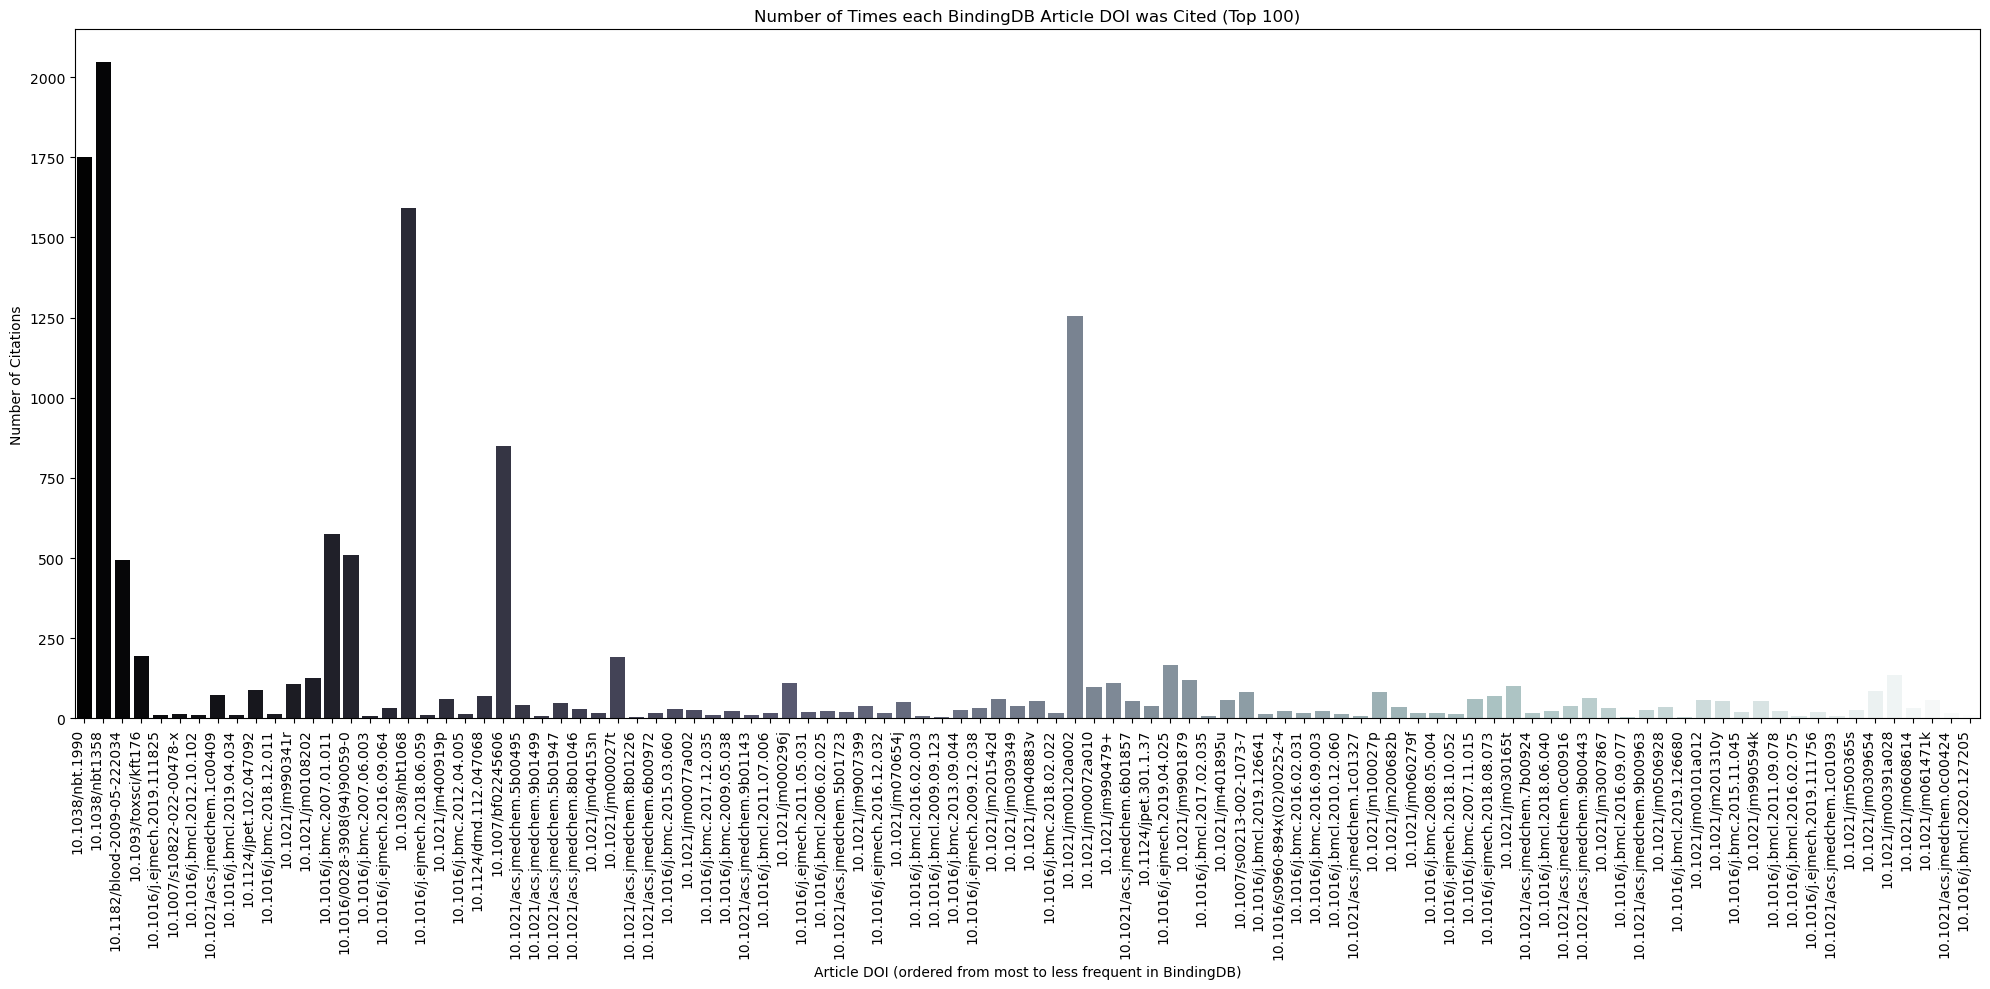

In [13]:
citations_df = pd.DataFrame(citations[0:100])
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="bone")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less frequent in BindingDB)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

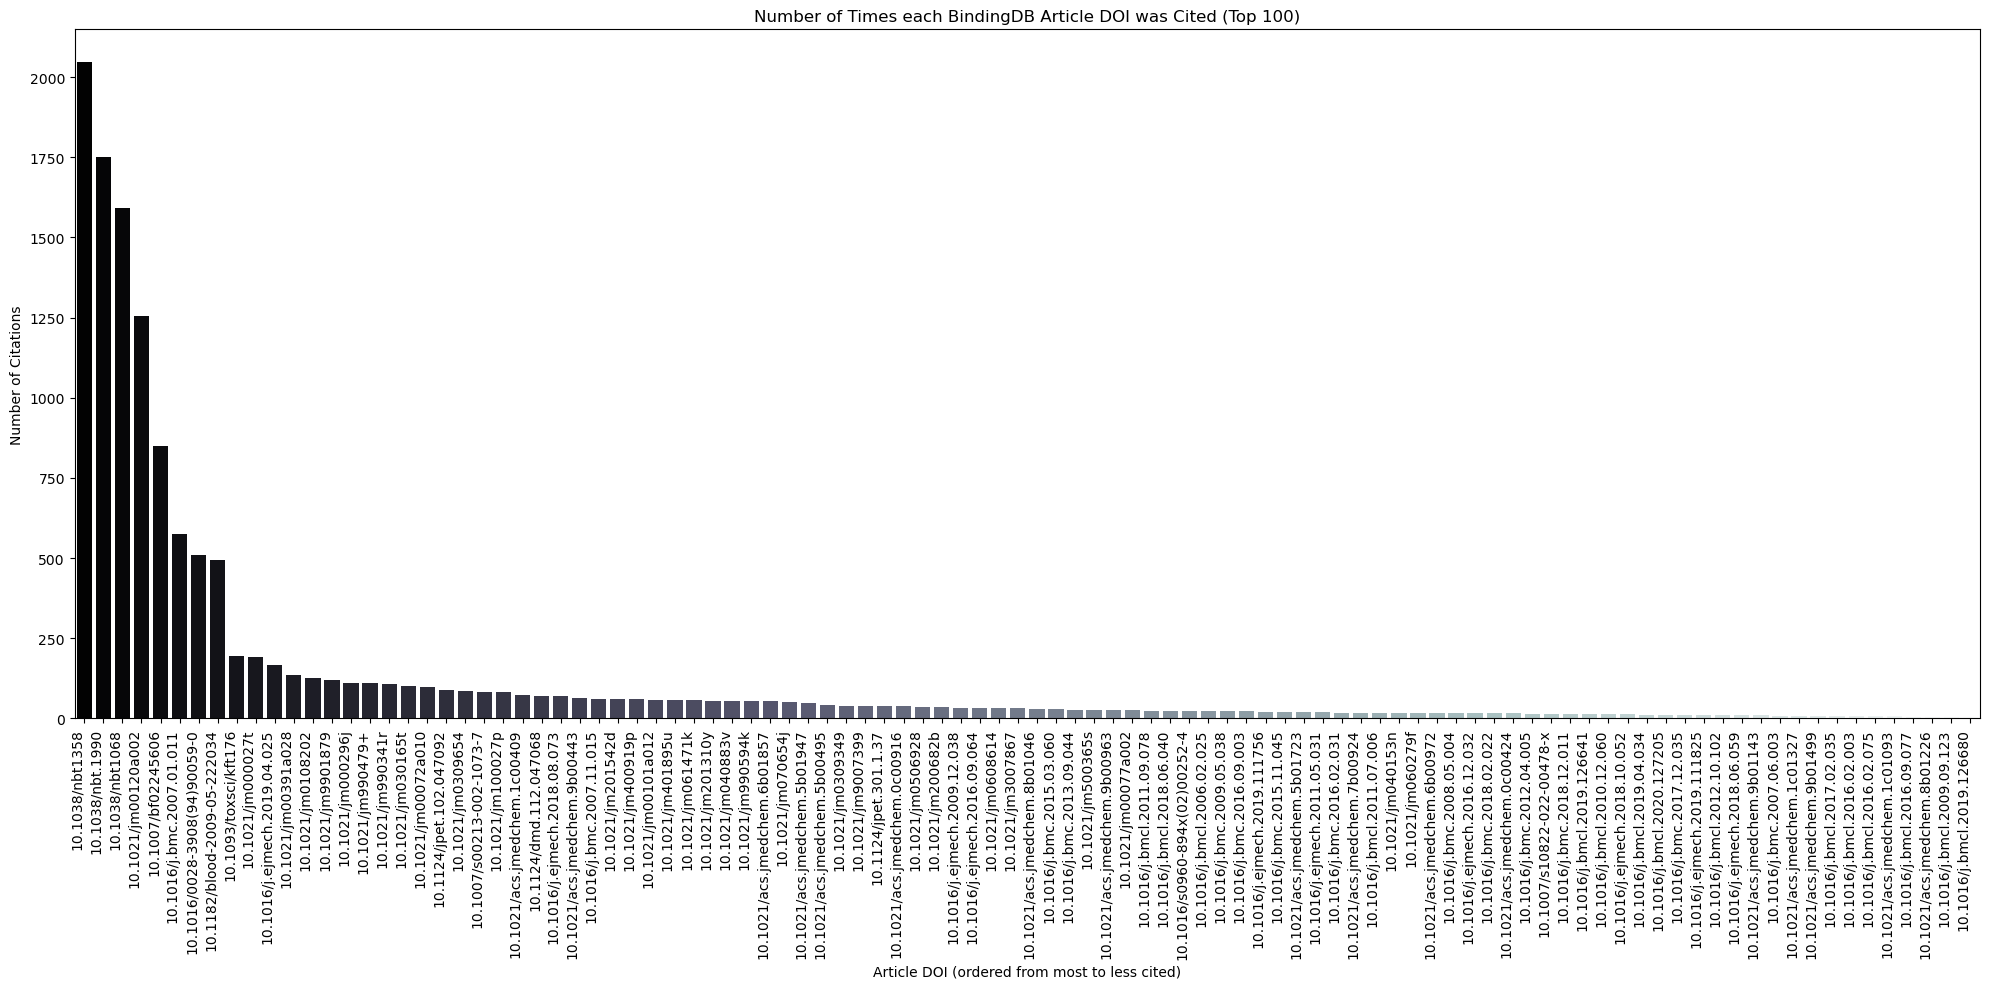

In [14]:
citations_df = pd.DataFrame(citations[0:100])
citations_df = citations_df.sort_values(by="citation", ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x="doi", y="citation", data=citations_df, palette="bone")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Article DOI (ordered from most to less cited)")
plt.ylabel("Number of Citations")
plt.title("Number of Times each BindingDB Article DOI was Cited (Top 100)")
plt.tight_layout()
plt.show()

In [ ]:
# import plotly.express as px
# fig = px.bar(
#     citations_df,
#     x="doi",
#     y="citation",
#     title="Number of Times each BindingDB Article was Cited (Top 100)"
# )
# fig.update_layout(
#     xaxis_title="Article DOI",
#     yaxis_title="Number of Citations",
#     xaxis=dict(tickangle=90), 
#     margin=dict(t=50, b=150),  
#     height=600, 
#     width=1200, 
#     template="plotly_dark"
# )
# fig.update_yaxes(categoryorder="total ascending")
# fig.show()

#### Depending on Diseases:

In [17]:
from src.scripts.disease_plotting import load_uniprotid_diseases

file_path = "../src/data/UniprotID_disases.json"
absolute_path = os.path.abspath(file_path)
disease_data = load_uniprotid_diseases(absolute_path)

In [18]:
from src.scripts.disease_plotting import add_keywords_when_comments_missing

disease_data = add_keywords_when_comments_missing(disease_data)

In [19]:
from src.scripts.disease_plotting import weigh_each_comment

disease_data = weigh_each_comment(bindingDB, disease_data)

In [20]:
# from src.scripts.disease_plotting import merge_and_explode_comments
from src.scripts.disease_plotting import sort_diseases

# diseases = merge_and_explode_comments(bindingDB,disease_data)
# diseases = (
#         bindingDB.merge(disease_data, how="inner")
#         .dropna(subset="comments_bfill")
#         .explode("comments_bfill")["comments_bfill"]
#         .to_frame()
#     )
# diseases["Disease Classes"] = diseases["comments_bfill"].apply(sort_diseases)

diseases = (
    bindingDB.merge(
        disease_data[
            ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
        ],
        how="inner",
    )
    .dropna(subset="comments_bfill")
    .explode("comments_bfill")[
        ["UniProt (SwissProt) Primary ID of Target Chain", "comments_bfill"]
    ]
)
diseases["Disease Classes"] = diseases["comments_bfill"].apply(sort_diseases)

In [21]:
disease_uniprot_mapping = (
    diseases.groupby("Disease Classes")[
        "UniProt (SwissProt) Primary ID of Target Chain"
    ]
    .apply(list)
    .reset_index()
)
disease_uniprot_mapping[
    "UniProt (SwissProt) Primary ID of Target Chain"
] = disease_uniprot_mapping["UniProt (SwissProt) Primary ID of Target Chain"].apply(
    lambda x: list(set(x))
)
disease_uniprot_mapping

,Disease Classes,UniProt (SwissProt) Primary ID of Target Chain
0,3-ketothiolase deficiency,[P24752]
1,3-methylglutaconic aciduria 8,[O43464]
2,3MC syndrome 1,[P48740]
3,"46,XX sex reversal 4",[Q13285]
4,"46,XX sex reversal 5",[P24468]
...,...,...
1804,Yao syndrome,[Q9HC29]
1805,Zimmermann-Laband syndrome 1,[O95259]
1806,Zimmermann-Laband syndrome 2,[P21281]
1807,Zimmermann-Laband syndrome 3,[Q9UGI6]


In [22]:
disease_uniprot_mapping_exploded = disease_uniprot_mapping.explode(
    "UniProt (SwissProt) Primary ID of Target Chain"
)
bindingDB = bindingDB.dropna(subset=["Article DOI"])
merged_data = bindingDB.merge(
    disease_uniprot_mapping_exploded[
        ["Disease Classes", "UniProt (SwissProt) Primary ID of Target Chain"]
    ],
    how="inner",
    on="UniProt (SwissProt) Primary ID of Target Chain",
)
disease_dois = (
    merged_data.groupby("Disease Classes")["Article DOI"].apply(list).reset_index()
)
disease_dois["Article DOI"] = disease_dois["Article DOI"].apply(lambda x: list(set(x)))
disease_dois

,Disease Classes,Article DOI
0,3MC syndrome 1,[10.1021/acs.jmedchem.7b00882]
1,"46,XX sex reversal 4","[10.1021/jm1014296, 10.1021/acsmedchemlett.5b0..."
2,"46,XY sex reversal 3","[10.1021/jm1014296, 10.1021/acsmedchemlett.5b0..."
3,"46,XY sex reversal 5","[10.1016/j.bmc.2019.115176, 10.1021/acs.jmedch..."
4,"46,XY sex reversal 6","[10.1016/j.ejmech.2019.01.066, 10.1021/jm30018..."
...,...,...
1631,Yao syndrome,"[10.1021/acs.jmedchem.6b01704, 10.1021/jm40184..."
1632,Zimmermann-Laband syndrome 1,[10.1021/acsmedchemlett.9b00181]
1633,Zimmermann-Laband syndrome 2,[10.1021/jm900277z]
1634,Zimmermann-Laband syndrome 3,"[10.1021/acsmedchemlett.0c00300, 10.1016/j.bmc..."


In [23]:
disease_dois["Article Count"] = disease_dois["Article DOI"].apply(len)
disease_dois = disease_dois.sort_values(by="Article Count", ascending=False)
# plt.figure(figsize=(20, 10))
# sns.barplot(data=disease_dois[0:10], x="Disease Classes", y="Article Count", palette = "viridis")
# plt.title("Number of Articles related to a Specific Disease Class")
# plt.xlabel("Disease Classes (Top 10)")
# plt.xticks(rotation=90)
# plt.show()

In [24]:
citations_dict = {item["doi"]: item["citation"] for item in citations}
disease_citations = []
for index, row in disease_dois.iterrows():
    disease_class = row["Disease Classes"]
    dois = row["Article DOI"]
    total_citations = 0
    for doi in dois:
        citation_count = citations_dict.get(doi, 0)  # 0 if DOI not found
        if citation_count != None:
            total_citations += citation_count
    disease_citations.append(
        {"Disease Classes": disease_class, "Total Citations": total_citations}
    )
disease_citations_df = pd.DataFrame(disease_citations)

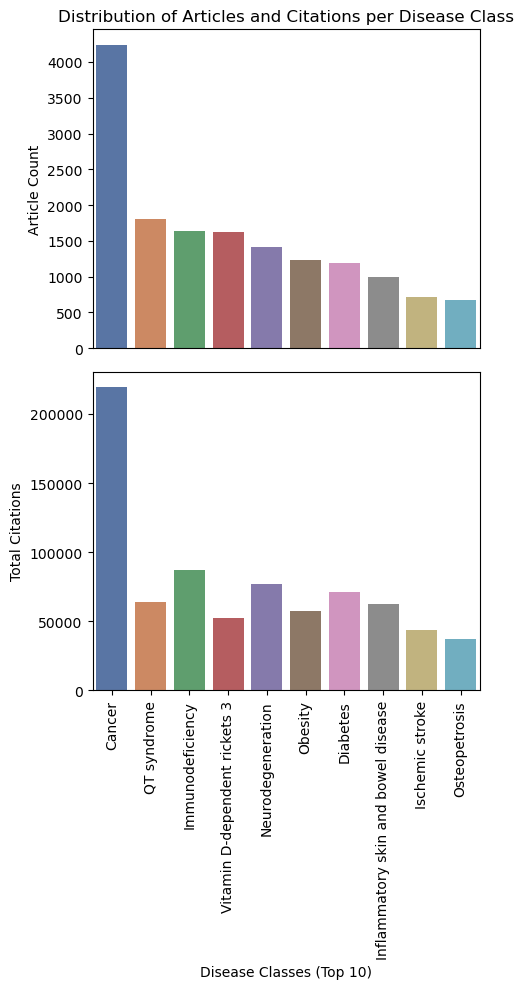

In [27]:
# disease_citations_df = disease_citations_df.sort_values(
#     by="Total Citations", ascending=False
# )
# plt.subplots(1,2)
# sns.barplot(
#     data=disease_citations_df.head(10), x="Disease Classes", y="Total Citations", palette = "viridis"
# )
# plt.title("Total Number of Citations related to a Specific Disease Class")
# plt.xlabel("Disease Classes (Top 10)")
# plt.xticks(rotation=90)
# plt.show()

fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
sns.barplot(
    data=disease_dois[0:10],
    x="Disease Classes",
    y="Article Count",
    palette="deep",
    ax=axes[0],
)
axes[0].set_title("Distribution of Articles and Citations per Disease Class")
axes[0].tick_params(axis="x", which="both", bottom=False)

sns.barplot(
    data=disease_citations_df.head(10),
    x="Disease Classes",
    y="Total Citations",
    palette="deep",
    ax=axes[1],
)
axes[1].set_xlabel("Disease Classes (Top 10)")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

In [33]:
import plotly.graph_objects as go

colors = sns.color_palette("Blues", 2).as_hex()

fig = go.Figure()
fig.add_trace(
    go.Bar(
        y=disease_citations_df['Disease Classes'][0:10],
        x=disease_citations_df['Total Citations'][0:10],
        name='Total Citations',
        orientation='h',
        marker=dict(color=colors[0]),
        offsetgroup=1
    )
)
fig.add_trace(
    go.Bar(
        y=disease_dois['Disease Classes'][0:10],
        x=disease_dois['Article Count'][0:10],
        name='Article Count',
        orientation='h',
        marker=dict(color=colors[1]),
        offsetgroup=2,
        xaxis='x2'
    )
)
fig.update_layout(
    title="Distribution of Articles and Citations per Disease Class",
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(
        title="Disease Classes",
        categoryorder="array",
        categoryarray=disease_citations_df['Disease Classes'][0:10][::-1] 
    ),
    xaxis=dict(
        title="Total Citations",
        titlefont=dict(color=colors[0]),
        tickfont=dict(color=colors[0])
    ),
    xaxis2=dict(
        title="Article Count",
        titlefont=dict(color=colors[1]),
        tickfont=dict(color=colors[1]),
        overlaying='x', 
        side='top',
        position=1
    ),
    barmode='group',
    legend=dict(x=1, y=1, traceorder='normal', orientation='v'),
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template='plotly_dark'
)
fig.show()

In [ ]:
custom_style = """
<style>
  body, html {
    background-color: rgb(34, 37, 41);
  }
</style>
"""

# Save the HTML file and inject the custom style
html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# Insert the style in the <head>
html_content = html_content.replace("</head>", f"{custom_style}</head>")

# Write to a file
with open("Citations_per_Disease.html", "w") as f:
    f.write(html_content)
fig.write_image("Citations_per_Disease.svg")

In [34]:
disease_citations_df = disease_citations_df.merge(disease_dois, on="Disease Classes")
disease_citations_df["Mean Citation per Article"] = (
    disease_citations_df["Total Citations"] / disease_citations_df["Article Count"]
)
disease_citations_df

,Disease Classes,Total Citations,Article DOI,Article Count,Mean Citation per Article
0,Cancer,219635,"[10.1016/S0960-894X(00)80296-6, 10.1021/jm1003...",4244,51.751885
1,QT syndrome,63645,"[10.1016/j.bmcl.2007.07.067, 10.1016/j.bmc.200...",1808,35.201881
2,Immunodeficiency,87404,"[10.1021/jm100301x, 10.1016/j.ejmech.2019.03.0...",1639,53.327639
3,Vitamin D-dependent rickets 3,52753,"[10.1021/acsmedchemlett.5b00322, 10.1021/acs.j...",1622,32.523428
4,Neurodegeneration,77148,"[10.1016/j.bmcl.2007.08.052, 10.1021/jm2006782...",1411,54.676116
...,...,...,...,...,...
1631,Developmental and epileptic encephalopathy 69,25,[10.1016/j.bmcl.2011.01.089],1,25.000000
1632,Developmental and epileptic encephalopathy 98,15,[10.1074/jbc.M114.557629],1,15.000000
1633,Neurodevelopmental disorder with visual defect...,65,[10.1021/acsmedchemlett.5b00214],1,65.000000
1634,Diarrhea 13,3,[10.1016/j.bmcl.2020.127722],1,3.000000


In [35]:
fig = px.bar(
    disease_citations_df[0:10],
    x="Mean Citation per Article",
    y="Disease Classes",
    orientation='h',
    title="Mean Citations per Article per Disease Class",
    log_x=True
)
fig.update_layout(
    yaxis_title="Disease Classes",
    title_x=0.5,
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark"
)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

### h index :

In [36]:
disease_citations_exp = []
for index, row in disease_dois.iterrows():
    disease_class = row["Disease Classes"]
    dois = row["Article DOI"]
    citations_list = []

    for doi in dois:
        citation_count = citations_dict.get(doi, 0)  # 0 if DOI not found
        citations_list.append({"DOI": doi, "Citations": citation_count})

    disease_citations_exp.append(
        {"Disease Classes": disease_class, "Citations": citations_list}
    )

disease_citations_exp_df = pd.DataFrame(disease_citations_exp)

A researcher has an h-index of h if h of their papers have at least h citations each, and the remaining papers have ≤h citations.

In [37]:
disease_h_index_exp = []

for index, row in disease_citations_exp_df.iterrows():
    disease_class = row["Disease Classes"]
    citations_counts = [
        entry["Citations"]
        for entry in row["Citations"]
        if entry["Citations"] is not None
    ]
    if citations_counts:
        h_index = sum(
            x >= i + 1 for i, x in enumerate(sorted(citations_counts, reverse=True))
        )
    else:
        h_index = 0
    disease_h_index_exp.append({"Disease Classes": disease_class, "H-Index": h_index})
disease_h_index_df = pd.DataFrame(disease_h_index_exp)
disease_h_index_df = disease_h_index_df.sort_values(by="H-Index", ascending=False)

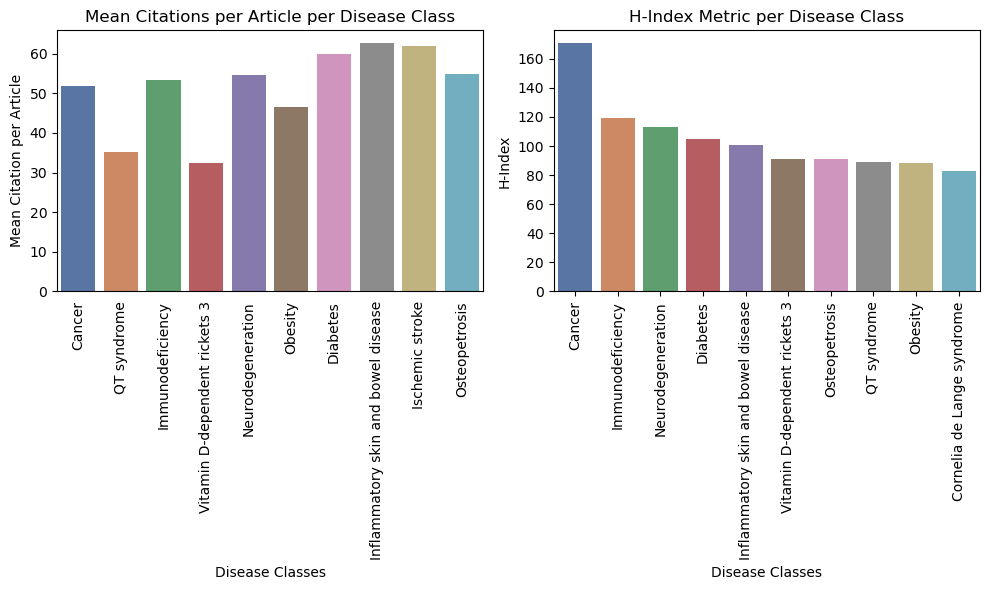

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(
    data=disease_citations_df.head(10),
    x="Disease Classes",
    y="Mean Citation per Article",
    palette="deep",
    ax=axes[0],
)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Mean Citations per Article per Disease Class")
axes[0].tick_params(axis="x", which="both", bottom=False)

# Adapting color palette for second plot so it matches the first (same diseases have same color)
deep_palette = sns.color_palette("deep", len(disease_citations_df.head(10)))
adapted_palette = []
for disease_class in disease_h_index_df.head(10)["Disease Classes"].values:
    clr = np.where(
        disease_h_index_df.head(10)["Disease Classes"].values == disease_class
    )[0][0]
    adapted_palette.append(deep_palette[clr])
else:
    adapted_palette.append(sns.color_palette("Set2", 1)[0])

sns.barplot(
    data=disease_h_index_df.head(10),
    x="Disease Classes",
    y="H-Index",
    palette=adapted_palette,
    ax=axes[1],
)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("H-Index Metric per Disease Class")

plt.tight_layout()
plt.show()

In [39]:
#colors = sns.color_palette("Blues", 1).as_hex()
colors = ['#6baed6']
fig = px.bar(
    disease_h_index_df[0:10],
    x="H-Index",
    y="Disease Classes",
    orientation='h',
    title="H-Index per Disease Class",
    log_x=True,
    color_discrete_sequence=colors
)
fig.update_layout(
    yaxis_title="Disease Classes",
    title_x=0.5,
    plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark"
)
fig.update_yaxes(categoryorder="total ascending")
fig.show()

### Timeseries:

In [40]:
doi_metadata = pd.read_csv("../src/data/metadata.csv").dropna()

doi_year_dict = dict(zip(doi_metadata["Article DOI"], doi_metadata["year"]))
disease_years = []

for index, row in disease_dois.iterrows():
    disease_class = row["Disease Classes"]
    dois = row["Article DOI"]
    years = []
    citations_count = []
    for doi in dois:
        year = doi_year_dict.get(doi)
        citation_count = citations_dict.get(doi, 0)
        if year is not None:
            years.append(year)
            citations_count.append(citation_count)
        disease_years.append(
            {
                "Disease Classes": disease_class,
                "Publication Years": years,
                "Citations": citations_count,
            }
        )
disease_years_df = pd.DataFrame(disease_years)
disease_years_df = disease_years_df.drop_duplicates(subset="Disease Classes")
disease_years_df

,Disease Classes,Publication Years,Citations
0,Cancer,"[1993.0, 2010.0, 2019.0, 2019.0, 2014.0, 2007....","[5, 46, 8, 5, 91, 24, 56, 23, 29, 31, 14, 22, ..."
4244,QT syndrome,"[2007.0, 2009.0, 2010.0, 2018.0, 2021.0, 2017....","[16, 27, 14, 188, 11, 30, 4, 25, 34, 55, 10, 3..."
6052,Immunodeficiency,"[2010.0, 2019.0, 2014.0, 2003.0, 2021.0, 2000....","[46, 8, 91, 27, 6, 970, 21, 20, 11, 46, 4, 23,..."
7691,Vitamin D-dependent rickets 3,"[2015.0, 2015.0, 2020.0, 2003.0, 2016.0, 2018....","[29, 48, 18, 48, 11, 188, 11, 11, 6, 40, 24, 1..."
9313,Neurodegeneration,"[2007.0, 2011.0, 2008.0, 2003.0, 2004.0, 2012....","[24, 152, 4, 154, 47, 16, 4, 315, 14, 79, 11, ..."
...,...,...,...
74473,Developmental and epileptic encephalopathy 69,[2011.0],[25]
74474,Developmental and epileptic encephalopathy 98,[2014.0],[15]
74475,Neurodevelopmental disorder with visual defect...,[2016.0],[65]
74476,Diarrhea 13,[2021.0],[3]


In [44]:
diseases_top_10 = disease_years_df.head(10)
disease_years_expanded = []
for _, row in diseases_top_10.iterrows():
    disease_class = row["Disease Classes"]
    years = row["Publication Years"]
    citations = row["Citations"]
    for year, citation in zip(years, citations):
        disease_years_expanded.append(
            {"Year": year, "Disease Classes": disease_class, "Citations": citation}
        )
expanded_df = pd.DataFrame(disease_years_expanded)
aggregated_df = expanded_df.groupby(["Year", "Disease Classes"], as_index=False)[
    "Citations"
].sum()
fig = px.area(
    aggregated_df,
    x="Year",
    y="Citations",
    color="Disease Classes",
    line_group="Disease Classes",
    title="Citations Over Time by Disease Class",
    labels={"Year": "Publication Year", "Citations": "Citation Count"},
)
fig.update_layout(height=400, width=1000,     title_x=0.5,
                      plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark")
fig.show()

In [ ]:
custom_style = """
<style>
  body, html {
    background-color: rgb(34, 37, 41);
  }
</style>
"""

# Save the HTML file and inject the custom style
html_content = fig.to_html(full_html=True, include_plotlyjs="cdn")
# Insert the style in the <head>
html_content = html_content.replace("</head>", f"{custom_style}</head>")

# Write to a file
with open("Timeseries_Citations_Diseases.html", "w") as f:
    f.write(html_content)

fig.write_image("Timeseries_Citations_Diseases.svg")

### Investigating Patents:

In [ ]:
from src.scripts.citations import get_citations_per_year_diseases

citations_time_diseases = get_citations_per_year_diseases(
    disease_citations_df, citations_dict
)
fig = px.area(
    citations_time_diseases,
    x="Year",
    y="Citations",
    color="Disease Classes",
    line_group="Disease Classes",
    title="Citations Over Time by Disease Class",
    labels={"Year": "Publication Year", "Citations": "Citation Count"},
)
fig.update_layout(height=400, width=1000,     title_x=0.5,
                      plot_bgcolor="rgb(34, 37, 41)", paper_bgcolor="rgb(34, 37, 41)",
    template="plotly_dark")
fig.show() # Uncomment this line to view the figure interactively
#fig.show(renderer="svg")

In [6]:
patents = bindingDB["Patent Number"].value_counts()
unique_patents_ordered = patents.index.tolist()

In [7]:
# Most studied ligands for each patent :
compounds_by_patent = bindingDB.groupby("Patent Number")[
    "BindingDB Ligand Name"
].unique()
# Most studied targets for each patent :
targets_by_patent = bindingDB.groupby("Patent Number")["Target Name"].unique()
# Nbr of unique targets for each patent -> broader = successful ? :
unique_target_counts = bindingDB.groupby("Patent Number")["Target Name"].nunique()
broad_patents = unique_target_counts.sort_values(ascending=False)

In [ ]:
from src.scripts.citations import get_patent_info

patent_info = []
for patent in unique_patents_ordered[0:100]:
    patent_info.append(get_patent_info(patent))

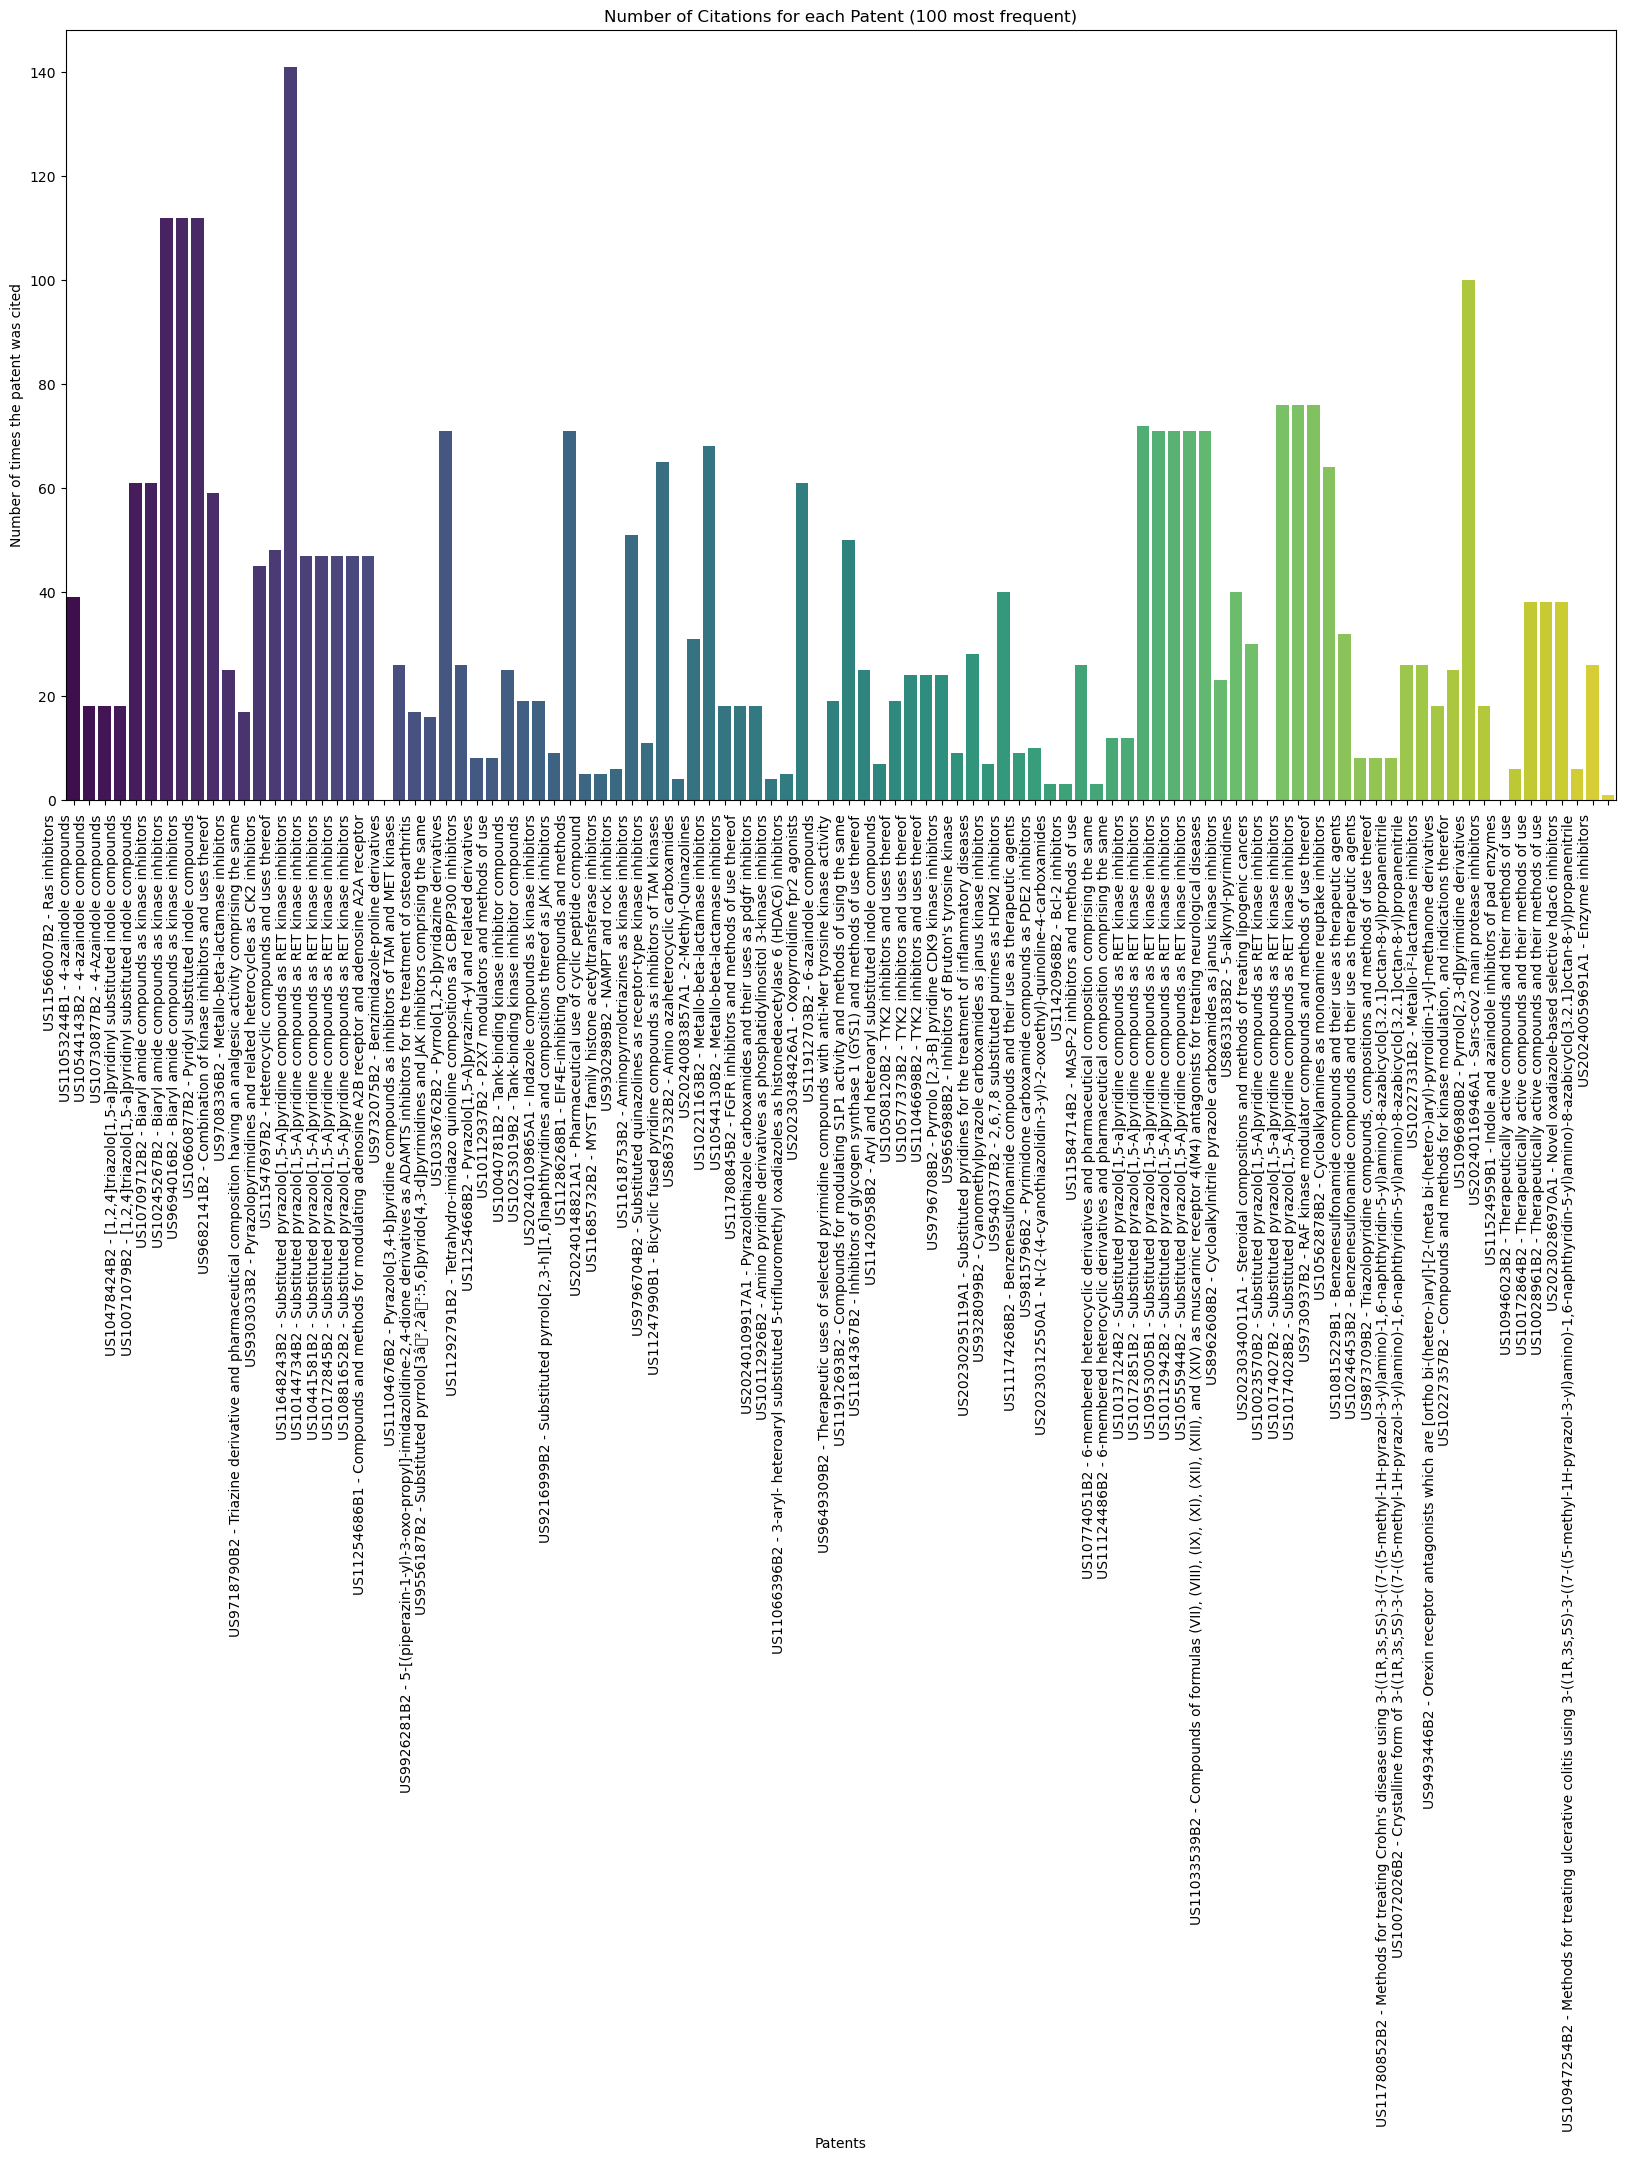

In [13]:
cleaned_patents = [patent for patent in patent_info if patent is not None]
citations = [
    int(patent["cited by"]) + int(patent["families citing"])
    for patent in cleaned_patents
    if "cited by" in patent and "families citing" in patent
]
patent_name = [
    patent["title"].replace(" - Google Patents", "")
    for patent in cleaned_patents
    if "title" in patent
]

data_citations = pd.DataFrame({"Patent": patent_name, "Cited By": citations})
plt.figure(figsize=(20, 10))
sns.barplot(x="Patent", y="Cited By", data=data_citations, palette="viridis")
plt.title("Number of Citations for each Patent (100 most frequent)")
plt.xlabel("Patents")
plt.ylabel("Number of times the patent was cited")
plt.xticks(rotation=90, ha="right")
plt.show()